# Automate Excel Reports Using Python

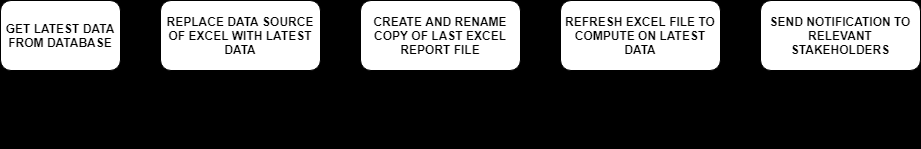

### Get Data From Oracle Using Python

In [1]:
#import cx_Oracle

#host = 'your-host-name'
#port = 'your-port-number-as-integer-without-quotes'
#sid = 'your-sid'
#tns = cx_Oracle.makedsn(host, port, sid)
#db = cx_Oracle.connect('your-username', 'your-password', tns)

### Get Data From MS SQL Server Using Python

In [31]:
import pandas as pd
import pyodbc
myconn=pyodbc.connect("DSN=Sabie")
df=pd.read_sql("select * from Scty_price",myconn)
df.shape

#### Database file
##### need to create DSN in system and install pyodbc
Create DSN - Steps: 
- control pane>system& security>admistrative tool>Data source ODBC>user DSN>clic add>in pop up window give name to DSN(it will be used in code)and server name
- select finish>next>change database to database which u want to extract ie "Sabie" >test data source connection> click ok >close all window

In [10]:
df.head()

,Sec_id,Prc_date,Mkt_Price,Currency,Pricing_factor
0,HCL205,2013-07-17,487.39,INR,1.0
1,HDFC305,2013-07-15,1187.15,INR,1.0
2,HUL109,2013-03-23,20.00,USD,100.0
3,ICIC201,2012-06-24,50.00,GBP,150.0
4,INC501,2011-01-10,15.00,SGD,50.0


In [41]:
myconn=pyodbc.connect("DSN=Sabie_NEW")

from pathlib import Path

query = Path('F:/1. Programs/SQL Queries/automatingReportTest.sql').read_text()
query
#df = pd.read_sql(query, myconn)

'\nselect distinct pp.productid, name\nfrom Production.Product as pp\ninner join Sales.SalesOrderDetail as sod\non pp.ProductID=sod.ProductID\nwhere ProductSubcategoryID =1'

In [42]:
df = pd.read_sql(query, myconn)
df.head()

,productid,name
0,771,"Mountain-100 Silver, 38"
1,772,"Mountain-100 Silver, 42"
2,773,"Mountain-100 Silver, 44"
3,774,"Mountain-100 Silver, 48"
4,775,"Mountain-100 Black, 38"


In [57]:
#mydb=pyodbc.connect("Driver={SQL Server};server=server_name(localhost);database=dbname,uid=user_id,pwd=password")
mydb=pyodbc.connect("Driver={SQL Server};server=ACER;database=AdventureWorks2008")
df=pd.read_sql(query,mydb)
df.head()

,productid,name
0,771,"Mountain-100 Silver, 38"
1,772,"Mountain-100 Silver, 42"
2,773,"Mountain-100 Silver, 44"
3,774,"Mountain-100 Silver, 48"
4,775,"Mountain-100 Black, 38"


In [93]:
file_name = 'F:/1. Programs/SQL Queries/latest_raw_data.csv'
df.to_csv(file_name, sep = '|', index = False)

### Get Latest File From Folder Using Python:

In [44]:
import glob
import os

list_of_files = glob.glob('F:/1. Programs/SQL Queries/*')
list_of_files

['F:/1. Programs/SQL Queries\\Assignments',
 'F:/1. Programs/SQL Queries\\automatingReportTest.sql',
 'F:/1. Programs/SQL Queries\\latest_raw_data 1.csv',
 'F:/1. Programs/SQL Queries\\latest_raw_data 2.csv',
 'F:/1. Programs/SQL Queries\\latest_raw_data.csv',
 'F:/1. Programs/SQL Queries\\Practice',
 'F:/1. Programs/SQL Queries\\Projects']

In [82]:
latest_file = max(list_of_files, key = os.path.getctime)
latest_file

'F:/1. Programs/SQL Queries\\latest_raw_data 2.csv'

In [83]:
latest_file = latest_file.split('\\',1)
latest_file

['F:/1. Programs/SQL Queries', 'latest_raw_data 2.csv']

In [85]:
latest_file = latest_file[1]
latest_file

'latest_raw_data 2.csv'

### Create Copy Of Latest File Using Python:

In [92]:
from shutil import copyfile
import datetime

today_date = datetime.datetime.today().strftime('%Y%m%d')
src = 'F:/1. Programs/SQL Queries/' + latest_file
new_file = today_date + '_latest_periodic_report.xlsx'
dst = 'F:/1. Programs/SQL Queries/' + new_file
copyfile(src, dst)

'F:/1. Programs/SQL Queries/20200314_latest_periodic_report.xlsx1'

### Refresh Excel File Using Python
Let us assume you already had a report being sent often that is computed out of this raw CSV data file that we have generated earlier. Many people I have met think, at this step, they must open Excel, click the refresh button, and save the file. What if I tell you that even this step can be automated?

Let us the take the new file we created out of the old file and refresh it using Python itself.

In [95]:
import win32com.client
import time

SourcePathName = 'F:/1. Programs/SQL Queries/' + new_file
Application = win32com.client.DispatchEx('Excel.Application')
Application.DisplayAlerts = False
Application.Visible = 1
Workbook = Application.Workbooks.open(SourcePathName)
Workbook.RefreshAll()
time.sleep(20)
Workbook.Save()
Workbook.Close()
Application.Quit()

### Send E-Mail Using Python
The report is now ready. However, there is an additional step. We may want to notify the concerned people that the report is ready and is stored in XYZ shared location. In this case, the shared location is a Windows drive H:. This can vary depending on how the shared network at your end looks like. You can send emails using Python by writing the following block of code:

In [96]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText


In [98]:

fromaddr = 'sab21.sahu@gmail.com'
toaddr = 'sab.sahu21@gmail.com'
body = 'The ABC analysis report has been updated and saved in XYZ location'

msg = MIMEMultipart()
msg['From'] = fromaddr
msg['To'] = toaddr
msg['Subject'] = 'TEST MSG - Sending from Python'
msg.attach(MIMEText(body, 'plain'))

server = smtplib.SMTP('smtp-name', 'port-number-without-quotes')
server.starttls()
server.login(fromaddr, 'password')
text = msg.as_string()
server.sendmail(fromaddr, toaddr, text)
server.quit()

### Schedule Job Using Python
Let us now assume that we need to send our Excel report every Monday at 12 PM. The block of code will look like:

In [ ]:
import schedule
import time

def generate_weekly_report():
    # The block of code from querying until sending email notification

schedule.every().monday.at('12:00').do(generate_weekly_report)

while True:
    schedule.run_pending()
    time.sleep(1)

Save the entire code in a file and run it from a Python terminal. You have now learnt how to refresh an Excel report by automating it using Python.